<a href="https://colab.research.google.com/github/fin-ash/MAIR/blob/main/EDA_Text_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
!pip install textstat
!pip install wordcloud
!pip install nltk
!pip install pandas

import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import string

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.util import ngrams
from nltk.corpus import brown, stopwords
from wordcloud import WordCloud
from textstat import flesch_reading_ease
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Download the required nltk packages
nltk.download('brown')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.3 MB/s eta 0:00:00


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Top 10 most frequent words:
     Word  Frequency
0     the       6455
165     i       3007
17    and       2986
4      of       2937
142     a       2766
50     to       2749
116  that       2176
14     in       1908
32     it       1886
112   was       1821


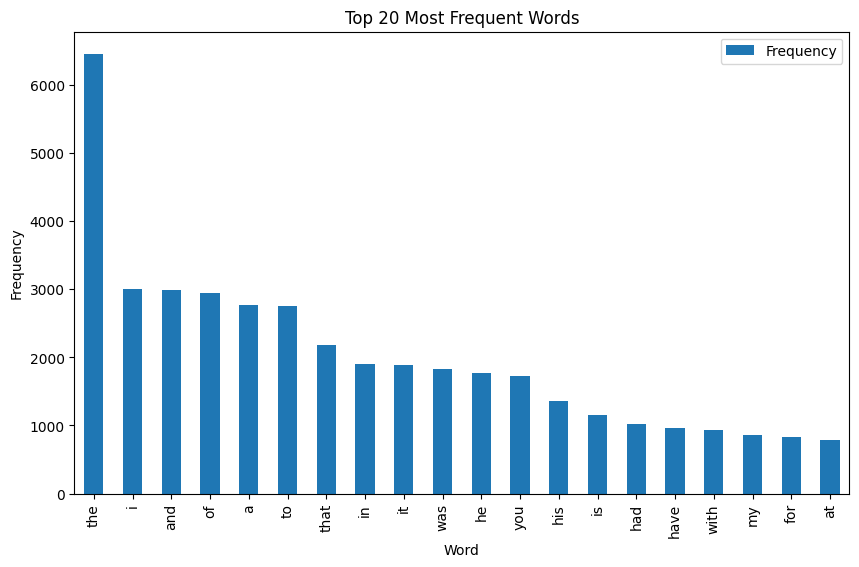

In [ ]:
# Define a function to perform exploratory data analysis on a text file
def explorative_data_analysis(file_path):
    # Read the text file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Clean and tokenize the text
    words = re.findall(r'\b\w+\b', text.lower())

    # Count the frequency of each word
    word_counts = Counter(words)

    # Convert to a DataFrame for analysis
    df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

    # Display the top 10 most frequent words
    print("Top 10 most frequent words:")
    print(df.head(10))

    # Plot the top 20 most frequent words
    df.head(20).set_index('Word').plot(kind='bar', figsize=(10, 6))
    plt.title('Top 20 Most Frequent Words')
    plt.ylabel('Frequency')
    plt.xlabel('Word')
    plt.show()

# Assuming the text file is named 'pg108.txt' and is available in the current directory
explorative_data_analysis('pg108.txt')

holmes: 735
said: 496
one: 436
upon: 413
would: 406
mr.: 393
man: 390
could: 335
us: 271
well: 270


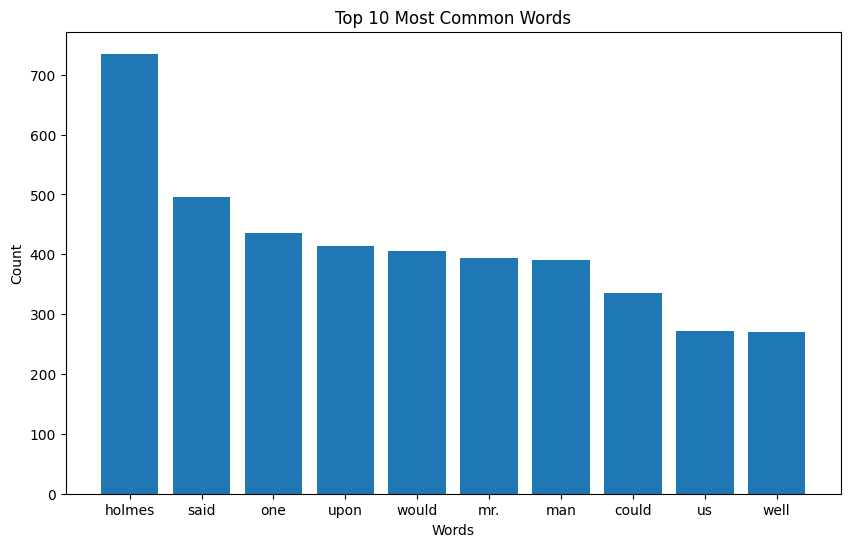

('mr.', 'holmes'): 183
('said', 'holmes'): 130
('sherlock', 'holmes'): 62
('project', 'gutenberg™'): 57
('let', 'us'): 45
('young', 'man'): 42
('could', 'see'): 32
('project', 'gutenberg'): 31
('dear', 'watson'): 31
('yes', 'sir'): 30


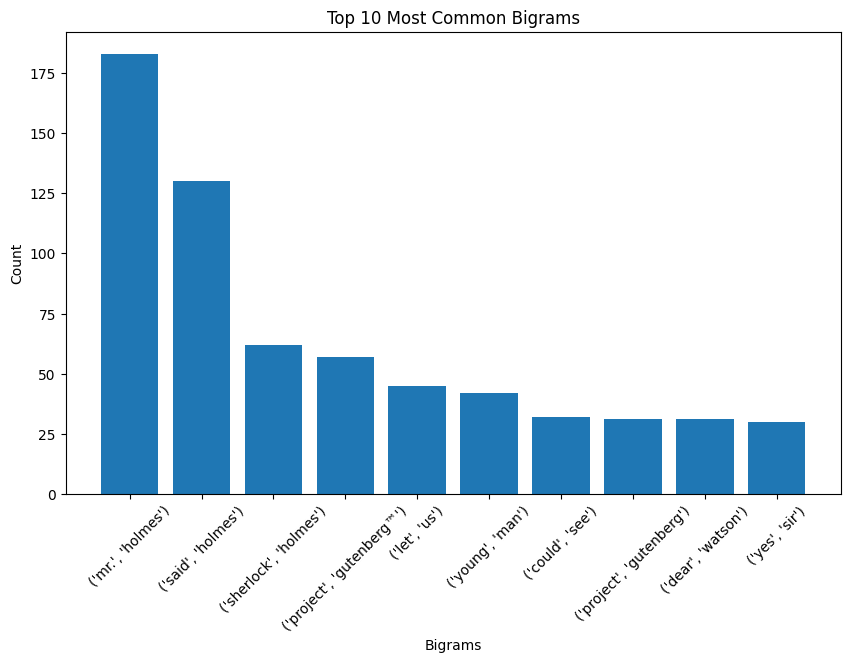

Topic 1:
watson: 211.1998065265405
come: 190.19982335061832
know: 163.1998724979393
good: 126.1997746578051
morning: 116.19975992375294
left: 115.1998723995265
eyes: 114.19987239659368
lady: 103.19987300482185
day: 92.19987231591438
project: 88.19987229690355


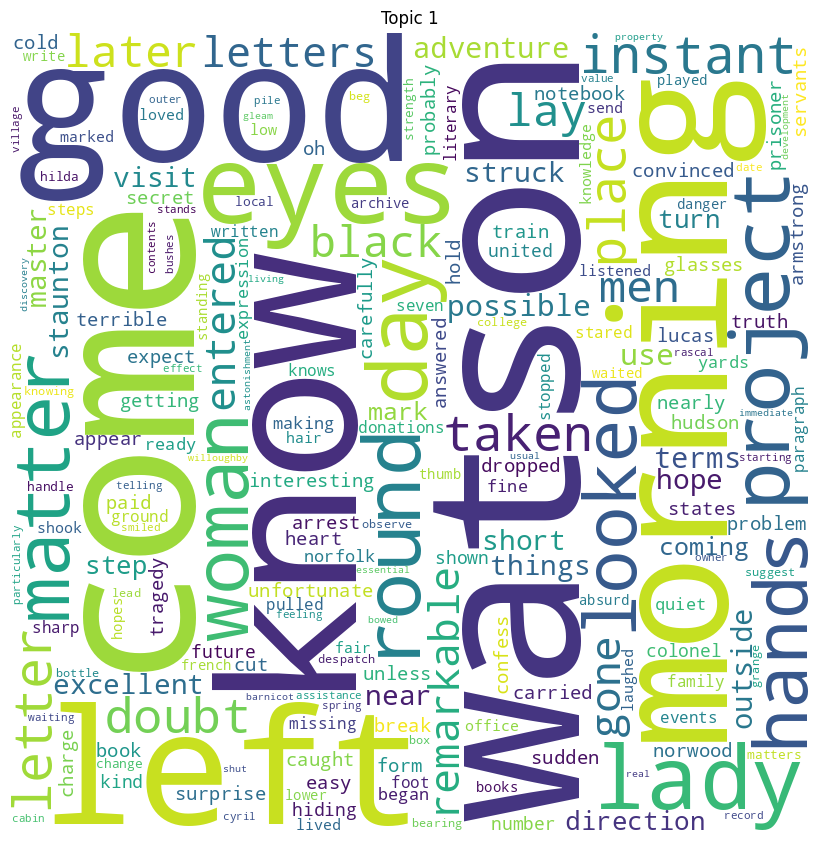

Topic 2:
mr: 412.19985519550863
sir: 188.19983886929225
way: 123.1998662895305
long: 120.19974004070414
say: 119.1998662785176
young: 115.19986626673767
make: 111.19986625410752
lestrade: 106.19976692288397
heard: 101.19986621814806
saw: 101.19986621814802


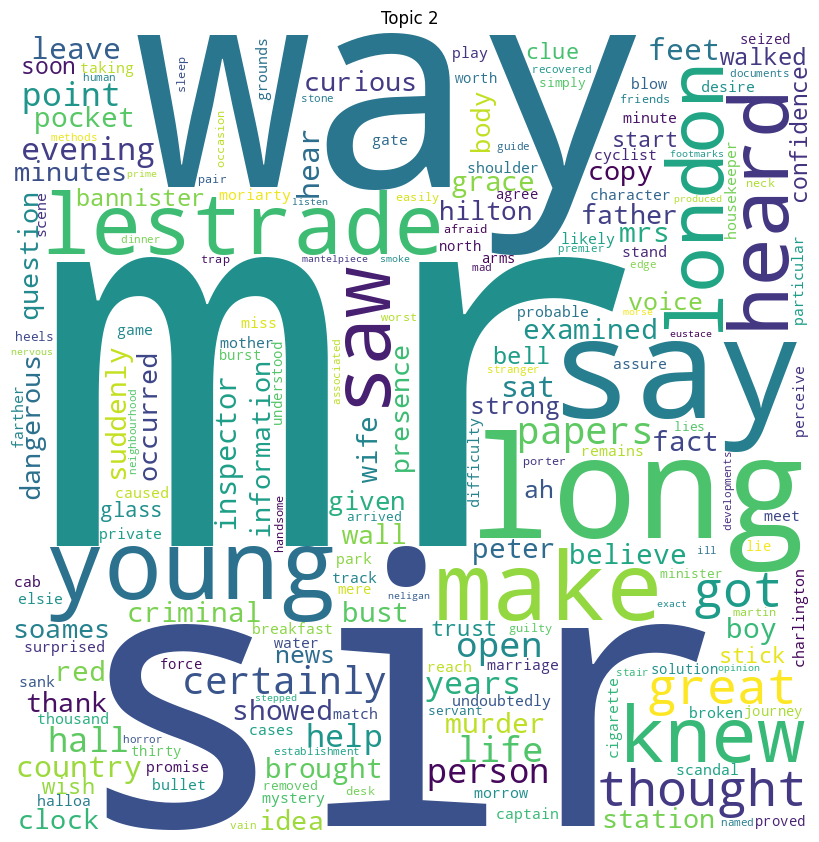

Topic 3:
holmes: 756.1998326097736
room: 229.19942746046297
think: 150.19985337852637
night: 149.19974086361225
house: 146.19967869948061
let: 97.19985321740958
look: 85.1998531529809
dear: 84.19985314677959
street: 82.19978696788216
away: 75.19985308350743


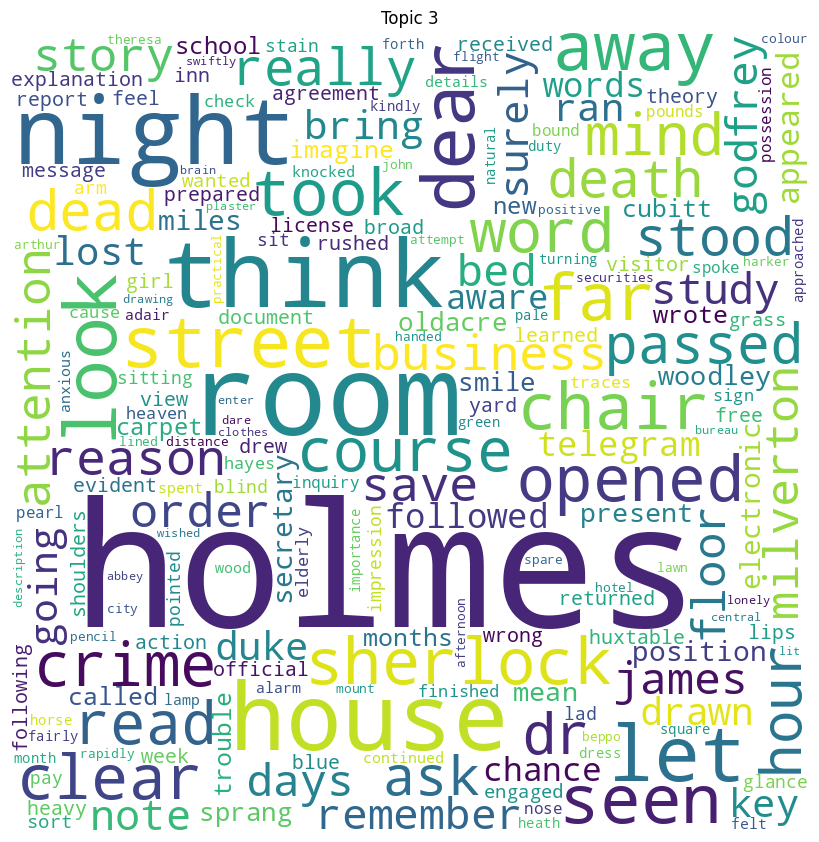

Topic 4:
said: 499.1998384204245
man: 401.19979494142996
time: 169.19978718652214
face: 165.1998507127838
door: 164.19978093038353
came: 155.19984966435595
little: 128.19984960265347
hand: 126.1998108874707
tell: 123.19984958825061
window: 105.1998519572858


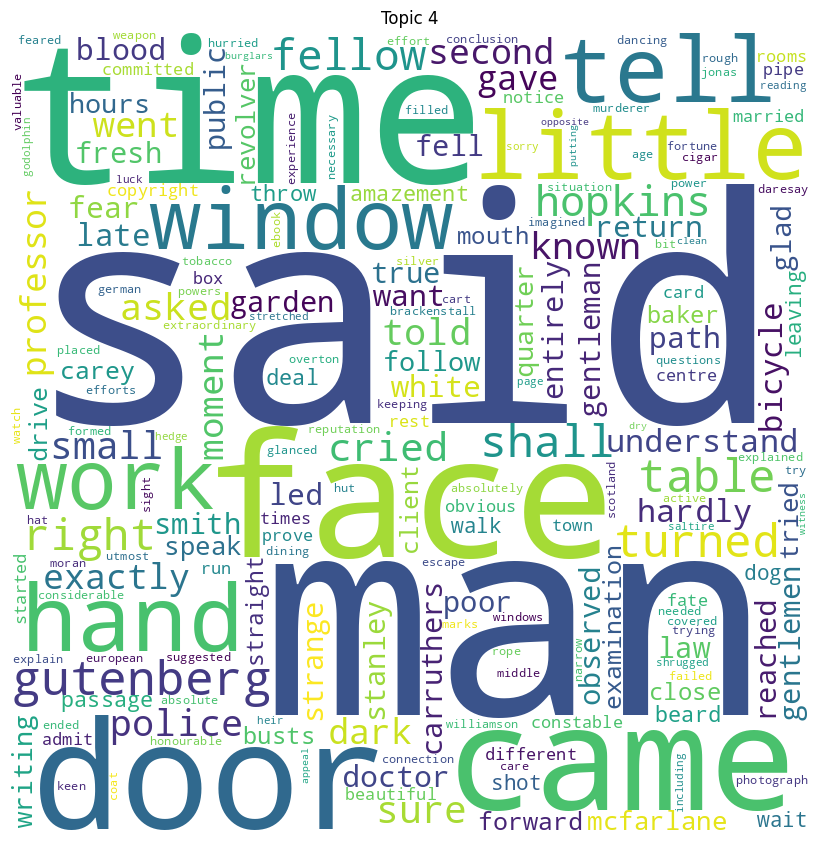

Topic 5:
yes: 142.19983932662524
case: 134.19983781194358
friend: 117.19987326041415
old: 112.19955495857057
like: 94.19982370830893
end: 82.19953682130803
road: 80.19987400690142
head: 80.19987310936315
light: 66.19973775442432
paper: 64.19980450219725


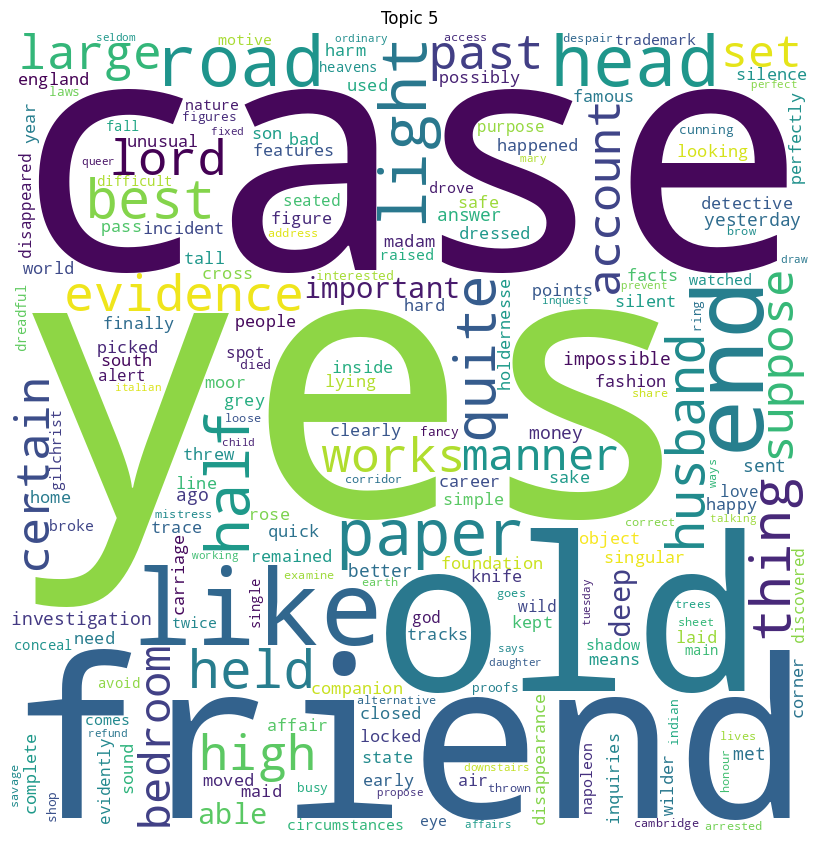

In [ ]:
# Define a function to perform exploratory data analysis on a text file
def explorative_data_analysis(file_path):
    # Read the text file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Convert all the text to lower case
    text = text.lower()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Get the list of common words (stopwords) from nltk
    common_words = stopwords.words('english')

    # Define a list of symbols to remove
    symbols = list(string.punctuation) + ['``', '--', "''", ',', "'", '“', '’','”']

    # Remove common words and symbols from the list of words
    filtered_words = [word for word in words if word not in common_words and word not in symbols]

    # Count the frequency of each word
    word_counts = Counter(filtered_words)

    # Get the 10 most common words
    most_common_words = word_counts.most_common(10)

    # Print the 10 most common words
    for word, count in most_common_words:
        print(f"{word}: {count}")

    # Convert the most common words to a DataFrame
    df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

    # Plot a bar chart of the word counts
    plt.figure(figsize=(10, 6))
    plt.bar(df['Word'], df['Count'])
    plt.title('Top 10 Most Common Words')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.show()

    # Generate bigrams
    bigrams = ngrams(filtered_words, 2)

    # Count the frequency of each bigram
    bigram_counts = Counter(bigrams)

    # Get the 10 most common bigrams
    most_common_bigrams = bigram_counts.most_common(10)

    # Print the 10 most common bigrams
    for bigram, count in most_common_bigrams:
      print(f"{bigram}: {count}")

    # Convert the most common bigrams to a DataFrame
    df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Count'])

    # Plot a bar chart of the bigram counts
    plt.figure(figsize=(10, 6))
    plt.bar(df['Bigram'].astype(str), df['Count'])
    plt.title('Top 10 Most Common Bigrams')
    plt.xlabel('Bigrams')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    vectorizer = CountVectorizer(stop_words='english')
    data_vectorized = vectorizer.fit_transform(filtered_words)
    lda_model = LatentDirichletAllocation(n_components=5).fit(data_vectorized)

    # Print the topics as word clouds
    for index, topic in enumerate(lda_model.components_):
        # Create a dictionary where the keys are the words and the values are the word weights
        topic_dict = {vectorizer.get_feature_names_out()[i]: weight for i, weight in enumerate(topic)}

        # Print the top words for this topic
        top_words = sorted(topic_dict.items(), key=lambda x: x[1], reverse=True)[:10]
        print(f"Topic {index + 1}:")
        for word, weight in top_words:
            print(f"{word}: {weight}")

        # Create a word cloud
        wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(topic_dict)

        # Display the word cloud
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.title(f"Topic {index + 1}")
        plt.show()

# Assuming the text file is named 'pg108.txt' and is available in the current directory
explorative_data_analysis('pg108.txt')


Average Word Length: 3.711375990569127
Sentiment Scores: {'neg': 0.09, 'neu': 0.797, 'pos': 0.113, 'compound': 1.0}
Topics: [[0.20004782 0.20004649 0.20002027 ... 0.20004669 1.19982542 1.19982542]
 [0.20004442 0.20004318 0.20001883 ... 0.20004337 0.20004229 0.20004229]
 [1.19981432 0.20004426 0.2000193  ... 0.20004445 0.20004334 0.20004334]
 [0.20004682 1.19982075 0.20001985 ... 0.20004572 0.20004457 0.20004457]
 [0.20004662 0.20004532 1.19992175 ... 1.19981977 0.20004438 0.20004438]]
Readability Score: 81.73


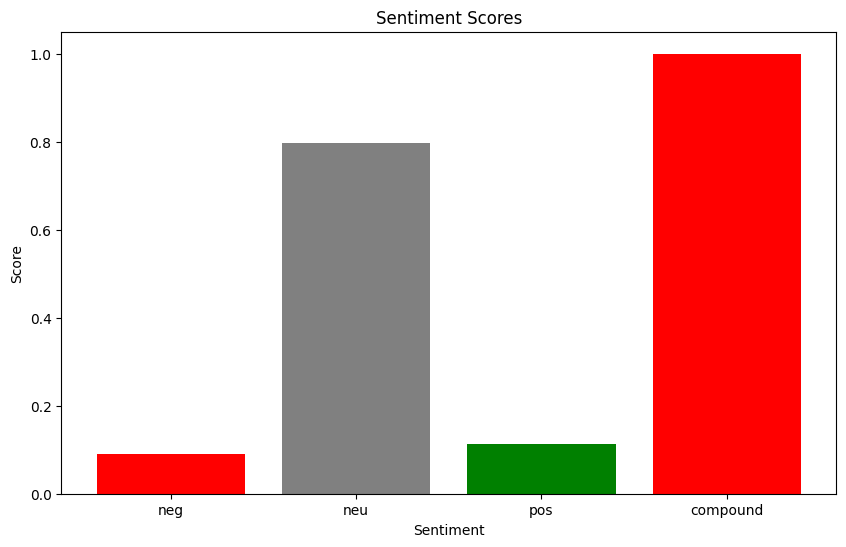

In [ ]:
# Define a function to perform exploratory data analysis on a text file
def explorative_data_analysis(file_path):
    # Read the text file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Clean and tokenize the text
    words = word_tokenize(text.lower())

    # Word Length Analysis
    word_lengths = [len(w) for w in words]
    print(f"Average Word Length: {sum(word_lengths) / len(word_lengths)}")

    # Sentiment Analysis
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    print(f"Sentiment Scores: {sentiment_scores}")

    # Topic Modeling
    vectorizer = CountVectorizer(stop_words='english')
    data_vectorized = vectorizer.fit_transform(words)
    lda_model = LatentDirichletAllocation(n_components=5).fit(data_vectorized)
    print(f"Topics: {lda_model.components_}")

    # Readability Score
    readability_score = flesch_reading_ease(text)
    print(f"Readability Score: {readability_score}")

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(sentiment_scores.keys(), sentiment_scores.values(), color=['red', 'grey', 'green', 'blue'])
    plt.title('Sentiment Scores')
    plt.xlabel('Sentiment')
    plt.ylabel('Score')
    plt.show()

# Assuming the text file is named 'pg108.txt' and is available in the current directory
explorative_data_analysis('pg108.txt')